# KI in deinen Notebooks

Press `s` for Speakers View!

## TL;DR

Läuft Ollama in der VM?

In [ ]:
%%bash
curl --silent http://127.0.0.1:11434

Wir nutzen die Bibliothek https://github.com/ollama/ollama-python

In [ ]:
from ollama import Client

und erstellen einen Client.

In [ ]:
client = Client(
  host='http://127.0.0.1:11434'
)

und bauen so KI in unsere Notebooks ein:

In [ ]:
# Message senden
response = client.chat(
    model='gemma3:270m', 
    messages=[
        {'role': 'user', 'content': 'Why is the sky usually blue and sometimes red?'},
    ]
)

# Antwort komplett ausgeben
print(response.message.content)

Wenn du die Ausgabe Zeile für Zeile möchtest, setze den Parameter `stream = True`. Das sieht dann so aus:

In [ ]:
# Eingabe mit ENTER abschliessen
mein_prompt = input("Prompt:")

In [ ]:
# Noch eine Nachricht senden
stream = client.chat(
    model='gemma3:270m',
    messages=[
        {'role': 'user', 'content': mein_prompt}
    ],
    stream=True,
)

# Diesmal die Antwort Zeile für Zeile ausgeben:
for chunk in stream:
  print(chunk['message']['content'], end='', flush=True)

## Ollama in der JupyterHub-VM

Für kleine Modelle genügt die in der VM eingebaute Ollama-Instanz. Die verfügbaren Modelle lässt du dir so anzeigen:

In [ ]:
%%bash
ollama list

Informationen zu einem einzelnen Modell, bspw. seine Grösse, erhälts du so:

In [ ]:
%%bash
ollama show gemma3:270m

Welche Modelle gerade ausgeführt werden, zeigt dir

In [ ]:
%%bash
ollama ps

Neue Modelle lädst du, indem du unter https://ollama.com/search dir eines aussuchst - bspw. `qwen3:0.6b` - und dann mit diesem Befehl herunterlädst:

In [ ]:
%%bash
ollama pull qwen3:0.6b

Achtung, schau dir **VORHER** auf https://ollama.com/search genau an, wie gross ein Modell ist. Modelle über 1 GB werden in der VM kaum performant laufen. Wenn du ein grösseres Modell laufen lassen willst, nutze dazu ein Ollama auf (d)einem Host-Rechner, wie weiter unten gezeigt wird.

Du löschst ein Modell mit diesem Befehl:

In [ ]:
%%bash
ollama rm NAME

Für NAME setze einen der Namen ein, den dir

In [ ]:
%%bash
ollama list

angezeigt hat.

## Ollama-Server vom Host nutzen

Du willst grössere Modell nutzen, die nicht in der VM laufen? Kein Problem!

**Wenn**

- [Ollama](https://ollama.com/download) auf dem VM-Host oder einem externen Server läuft.
  - Vorteile: mehr RAM, CPU-Kerne und SSD-Speicher sowie Hardwarebeschleunigung durch eine GPU.
- **Und** du unter Settings "Expose Ollama to the Network" aktiviert hast.
- **Und** unter VirtualBox oder UTM eine passende Port-Weiterleitungs-Regel existiert.

**Dann**
- kannst du aus Jupyter unter der URL `http://10.0.2.2:11434` auf Ollama auf dem Host zugreifen.

Überprüfe ggf. die Weiterleitungsregeln in der VM unter: `Ändern -> Netzwerk -> Port Weiterleitung`

|Name|Protokoll|Host-IP|Host-Port|Gast-IP|Gast-Port|
|--|--|--|--|--|--|
|ollama-ext|TCP|10.0.2.2|11434|127.0.0.1|11434|

Setze für Gast-IP die Adresse des externen Ollama-Servers ein. `127.0.0.1` bedeutet, dass Ollama auf dem VM-Host, also deinem Computer, läuft.

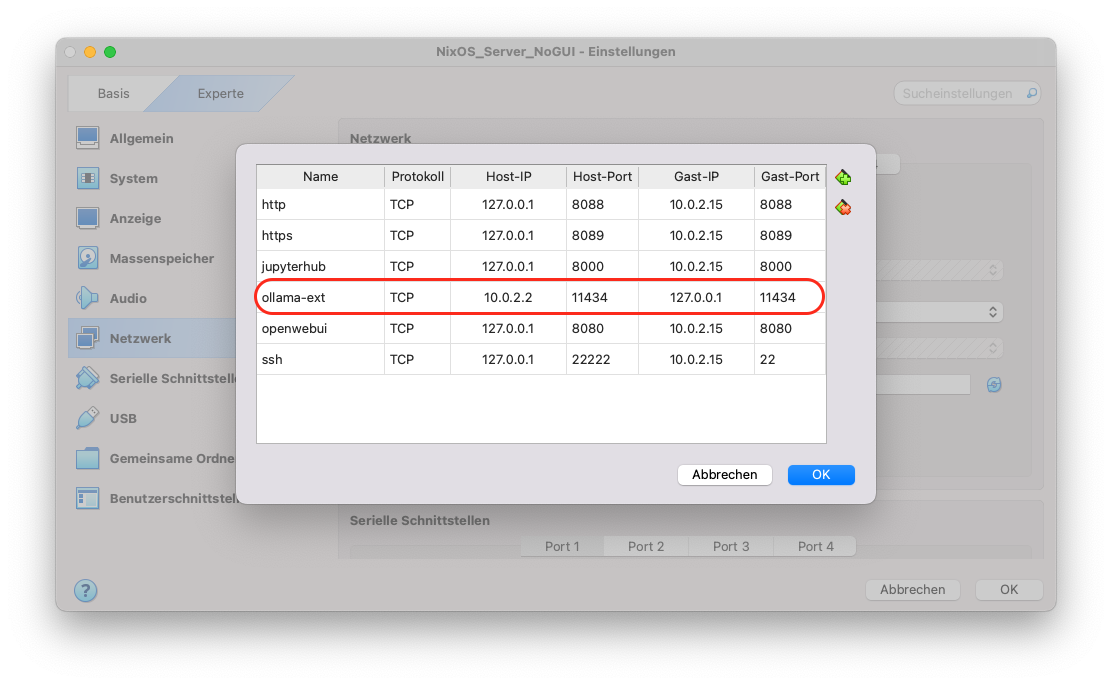

So testest du, ob der externe Ollama-Server erreichbar ist:

In [ ]:
%%bash
curl --silent http://10.0.2.2:11434

So nutzt du ein LLM, das nicht in der VM selbst läuft, sondern extern:

In [ ]:
from ollama import Client

In [ ]:
# http://127.0.0.1:11434 - Ollama läuft in der JupyterHub-VM
# http://10.0.2.2:11434 - Ollama läuft auf dem Host

client = Client(
  host='http://10.0.2.2:11434'
)

Welche Modelle gibt es auf dem externen Ollama-Server?

Da Ollama nicht mehr in der VM läuft, können wir `ollama` via `%%bash` nicht mehr verwenden, sondern müssen den `client` nutzen.

In [ ]:
client.list()

Das ist ja sehr unübersichtlich! Deshalb schreiben wir uns eine kleine Hilfsfunktion.

In [ ]:
def show_models_from_(output):
    """Zeigt die Modelle in einer ollama-python-client-Ausgabe an"""
    for entry in output['models']:
        print(entry["model"])

und verwenden diese Hilfsfunktion mit der Ausgabe von `client.list()`

In [ ]:
show_models_from_(client.list())

Neue Modelle installierst du auf dem Server von Jupyter aus so:

In [ ]:
client.pull('gemma3:270m')

Jetzt kannst du wie gewohnt die Abfragen ausführen:

In [ ]:
response = client.chat(model='gemma3:270m', messages=[
  {
    'role': 'user',
    'content': 'What is the best Programming Language??',
  },
])

und die Antwort komplett ausgeben

In [ ]:
print(response.message.content)

Teste auch diesen Befehl, der dir die gerade auf dem Server laufenden Modelle anzeigt:

In [ ]:
show_models_from_(client.ps())

was lediglich eine mit unserer kleinen Hilfsfunktion formatierte Ausgabe dieses Befehls ist:

In [ ]:
client.ps()

Teste ggf. auch das Löschen eines (kleinen) Modells:

In [ ]:
show_models_from_(client.list())

In [ ]:
client.delete('NAME')

In [ ]:
show_models_from_(client.list())

Schau dir die [Dokumentation](https://github.com/ollama/ollama-python?tab=readme-ov-file#api) der Bibliothek `ollama` an, um deine Möglichkeiten zu erkunden.